In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = np.array([[10,5],[2,1],[3,7]])

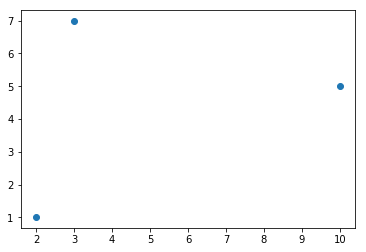

In [9]:
plt.scatter(x[:, 0], x[:, 1])

Let us randomly initialize that the mean is [3,4] and covariance = [[0  3],[3  0]] and the cluster responsibility is one-third(1/3)

In [19]:
initial_cluster_resp = (1/3.0)
initial_mean = [3,4]
initial_cov = [[3,0],[0,3]]

In [15]:
from scipy.stats import multivariate_normal

(1/3) * multivariate_normal.pdf([10,5], mean = [3,4], cov=[[3,0],[0,3]])

4.2506655933973963e-06

In [17]:
(1/3.) * multivariate_normal.pdf([10,5], mean=[6,3], cov=[[3,0],[0,3]])

0.00063085470900473429

In [18]:
(1/3.) * multivariate_normal.pdf([10,5], mean=[4,6], cov=[[3,0],[0,3]])

3.7104648102670329e-05

In [60]:
resp = np.zeros((3,3))
resp

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [61]:
resp[:, 0] = (1/3) * multivariate_normal.pdf(x, mean = [3,4], cov=[[3,0],[0,3]])
resp

array([[  4.25066559e-06,   0.00000000e+00,   0.00000000e+00],
       [  3.34005398e-03,   0.00000000e+00,   0.00000000e+00],
       [  3.94580755e-03,   0.00000000e+00,   0.00000000e+00]])

In [62]:
resp[:, 1] = (1/3) * multivariate_normal.pdf(x, mean = [6,3], cov=[[3,0],[0,3]])
resp

array([[  4.25066559e-06,   6.30854709e-04,   0.00000000e+00],
       [  3.34005398e-03,   6.30854709e-04,   0.00000000e+00],
       [  3.94580755e-03,   2.74168326e-04,   0.00000000e+00]])

In [63]:
resp[:, 2] = (1/3) * multivariate_normal.pdf(x, mean = [4,6], cov=[[3,0],[0,3]])
resp

array([[  4.25066559e-06,   6.30854709e-04,   3.71046481e-05],
       [  3.34005398e-03,   6.30854709e-04,   1.40762712e-04],
       [  3.94580755e-03,   2.74168326e-04,   1.26710556e-02]])

In [64]:
resp_prop = resp/np.sum(resp,axis=1).reshape(-1,1)
resp_prop

array([[ 0.00632342,  0.93847858,  0.055198  ],
       [ 0.81233485,  0.15343023,  0.03423491],
       [ 0.23360371,  0.01623159,  0.7501647 ]])

In [65]:
soft_counts = np.sum(resp_prop, axis=0)
soft_counts

array([ 1.05226198,  1.10814041,  0.83959761])

In [66]:
# Cluster Weights
soft_counts/np.sum(soft_counts)

array([ 0.35075399,  0.36938014,  0.27986587])

The soft counts, normalized by their sum, are the new estimates of cluster weights. In this example, the
new estimates are 0.351, 0.369, and 0.280 for clusters A, B, and C, respectively.

Notice now that clusters A and B gained weight (from 0.333), while cluster C lost weight. According to
the soft counts, cluster A and B are larger than the average cluster size, namely 1.

**Means** 

We first add fractional parts of all data points, using the cluster responsibilities:

In [85]:
resp_prop.T.dot(x)      # Calculating the sum product and then below cell is dividing to get the weighted mean

array([[ 2.38871501,  2.47917789],
       [ 9.74034107,  4.95944429],
       [ 2.87094392,  5.56137782]])

In [146]:
new_means = resp_prop.T.dot(x) / soft_counts.reshape(-1,1)
new_means

array([[ 2.27007633,  2.35604626],
       [ 8.78980767,  4.47546561],
       [ 3.4194284 ,  6.62386092]])

<b>Covariances</b>

In [127]:
final = resp_prop[:, 0].reshape(-1,1) * x
final

array([[ 0.06323419,  0.03161709],
       [ 1.6246697 ,  0.81233485],
       [ 0.70081112,  1.63522595]])

In [159]:
diff = x - new_means[0]
diff

array([[ 7.72992367,  2.64395374],
       [-0.27007633, -1.35604626],
       [ 0.72992367,  4.64395374]])

In [160]:
diff.T.dot(diff)      # This is the where you are making the mistake.

array([[ 60.35744965,  24.19352836],
       [ 24.19352836,  30.39565923]])

In [172]:
first = resp_prop[0, 0] * diff[0, :].reshape(-1, 1).dot(diff[0].reshape(1,-1))
first

array([[ 0.37783516,  0.12923526],
       [ 0.12923526,  0.04420381]])

In [173]:
second = resp_prop[1, 0] * diff[1, :].reshape(-1, 1).dot(diff[1].reshape(1,-1))
second

array([[ 0.0592527 ,  0.29750627],
       [ 0.29750627,  1.49377124]])

In [174]:
third = resp_prop[2, 0] * diff[2, :].reshape(-1, 1).dot(diff[2].reshape(1,-1))
third

array([[ 0.12446138,  0.7918539 ],
       [ 0.7918539 ,  5.03796911]])

In [177]:
(first + second + third) / soft_counts[0]

array([[ 0.53365916,  1.15807228],
       [ 1.15807228,  6.24934122]])